In [43]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helpers_nn import *
from sdlbfgs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [45]:
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [46]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [47]:
print(valloader)
len(valloader)

157

64 images in each batch and each image has a dimension of 28 x 28 pixels


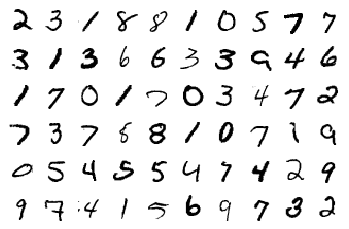

In [48]:
# A subset of a batch is plotted to show a sample of the dataset. 
dataiter = iter(trainloader)
images, labels = dataiter.next()
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Neural Network 

### Model definition
The model is defined, specifying the structure of the neural network.

### Model A: FCNN
Fully connected neural network, with hidden layer structure through vector *hidden_sizes*.

In [49]:
# Input and output sizes and network structure are defined.
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

# The model is built
modelA=fully_connected_NN(sizes)
print(modelA)

# Loss of the model is defined.
criterion = nn.NLLLoss()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


### Model B: CNN
Convolutional neural network composed of two convolutional layers and two fully connected layers.

In [50]:
images,_=dataiter.next()
image_size=images[0].shape[1]
# Using nn.CrossEntropyLoss allows to avoid specifying LogSoftmax as final layer.
criterion = nn.CrossEntropyLoss()
# Depending on the size of the image, a CNN model is built.
modelB=ConvNet(image_size)

# SGD learning rate optimization 



### Fully connected network

In [71]:
grid =[ 1e-3, 1e-2]
#, 1e-1, 0.2, 0.4]


In [72]:
epochs =1
training_loss, test_loss,training_accuracy, test_accuracy, time =learning_rate_optimization_SGD(input_size, output_size, trainloader, valloader, grid,epochs)

Learning rates to try: [0.001, 0.01]
Epoch 0
Training loss: 0.5959544440926011
Number Of Images Tested = 10000
Model Accuracy = 0.9072
Number Of Images Tested = 60000
Model Accuracy = 0.9012833333333333
Test loss: 0.31481641288965373 


Training Time (in minutes) = 1.598748548825582
Epoch 0
Training loss: 0.6220222136486314
Number Of Images Tested = 10000
Model Accuracy = 0.9119
Number Of Images Tested = 60000
Model Accuracy = 0.9074
Test loss: 0.30540018599883767 


Training Time (in minutes) = 1.9178391853968302


ValueError: not enough values to unpack (expected 5, got 4)

In [66]:
print(training_loss)
print(test_loss)
print(training_accuracy)
print(test_accuracy)


[0.6637834005280218, 0.19557875011171869]
[0.16663538721526505, 0.046910770207785876]
[0.9491333333333334, 0.98395]
[0.9522, 0.986]


### CNN

In [65]:
epochs = 1
grid =[ 1e-3, 1e-2]

training_loss, test_loss,training_accuracy, test_accuracy =learning_rate_optimization_SGD_CNN(input_size, output_size, trainloader, valloader, grid,epochs)

28
Learning rates to try: [0.001, 0.01]
Epoch 0
Training loss: 0.6637834005280218
Number Of Images Tested = 10000
Model Accuracy = 0.9522
Number Of Images Tested = 60000
Model Accuracy = 0.9491333333333334
Test loss: 0.16663538721526505 


Training Time (in minutes) = 10.54668730099996
Epoch 0
Training loss: 0.19557875011171869
Number Of Images Tested = 10000
Model Accuracy = 0.986
Number Of Images Tested = 60000
Model Accuracy = 0.98395
Test loss: 0.046910770207785876 


Training Time (in minutes) = 7.619782833258311


In [67]:
print(training_loss)
print(test_loss)
print(training_accuracy)
print(test_accuracy)



[0.6637834005280218, 0.19557875011171869]
[0.16663538721526505, 0.046910770207785876]
[0.9491333333333334, 0.98395]
[0.9522, 0.986]


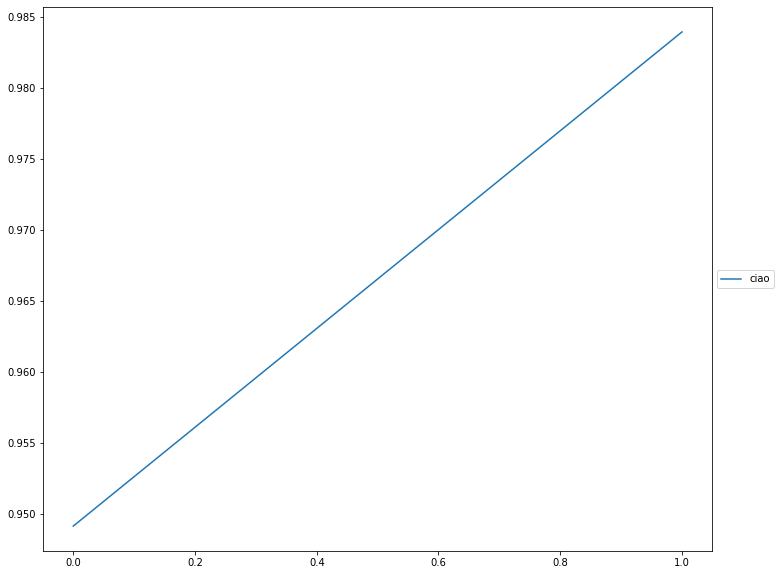

In [84]:
plt.figure(1, figsize = (12,10))
plt.plot(training_accuracy,label="ciao")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("img/a.jpg")